# Titanic - Part 2: Data Visualization and Analysis

## 1. Importing Dataset and Necessary Packages

In [1]:
import numpy as np                                  # linear algebra
import os                                           # package used to set work directory
import pandas as pd                                 # package used to create dataframes
import re                                           # regular expressions
import matplotlib.pyplot as plt
import seaborn as sns                               # statistic data visualizations

from operator import itemgetter                     # package used for sorted, max, min 

In [2]:
data_test = pd.read_csv('preprocessed_testdata.csv')
df_test = data_test.copy()

data_train = pd.read_csv('preprocessed_traindata.csv')
df_train = data_train.copy()

In [3]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
 11  Nationality  418 non-null    object 
 12  Missing_Age  418 non-null    int64  
 13  Deck         418 non-null    object 
 14  Title        418 non-null    object 
 15  Surname      418 non-null    object 
 16  Firstname    418 non-null    object 
dtypes: float64(2), int64(5), object(10)
memory usage: 55.6+ KB


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Nationality  891 non-null    object 
 13  Missing_Age  891 non-null    int64  
 14  Deck         891 non-null    object 
 15  Title        891 non-null    object 
 16  Surname      891 non-null    object 
 17  Firstname    891 non-null    object 
dtypes: float64(2), int64(6), object(10)
memory usage: 

## 2. Visualization and Analysis

We're interested in predicting the survival of a passenger using their information recorded in various features. Right now, we have no idea what the individual relation between survival and the features look like. Since the number of features is not too big, we can go through them one by one and see how they behave for the two classes (survival or death).

We are going to focus on the training set and will treat the test set as unknown data.

In [5]:
df = df_train.copy()

### 2.1 The Effect of Age on Survival

`Age` is a quantitative variable. We will use a density plot to see how age relates to survival.

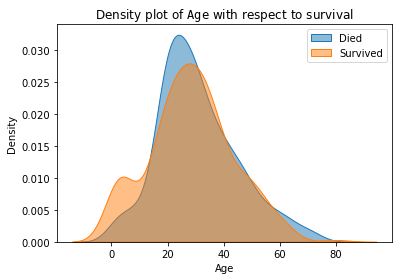

In [6]:
sns.kdeplot(df['Age'].iloc[np.where(df['Survived'] == 0)], fill=True, alpha=0.5, label='Died')
sns.kdeplot(df['Age'].iloc[np.where(df['Survived'] == 1)], fill=True, alpha=0.5, label='Survived')
plt.legend()
plt.title('Density plot of ' + r'$\mathtt{Age}$' + ' with respect to survival')
plt.show()

Notice that the people that survived tend to be a little older, but infants actually had better odds at survival.

### 2.2 The Effect of Sex on Survival

If you have watched the movie *Titanic*, you might remember that they let the women off the ship first. This commonly is the case in disasters. We're interested to see how this impacts survival rates between the two sexes.

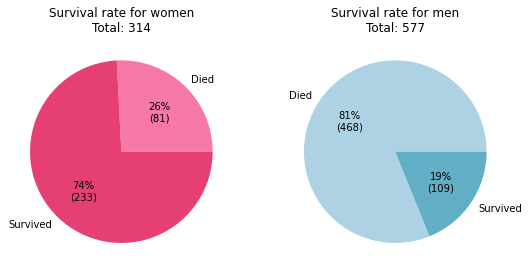

In [7]:
pie_overall = [
    np.mean(df['Sex'] == 'female'),
    np.mean(df['Sex'] == 'male')
]

pie_female = [
    sum((df['Sex'] == 'female') & (df['Survived'] == 0)),
    sum((df['Sex'] == 'female') & (df['Survived'] == 1))
]

pie_male = [
    sum((df['Sex'] == 'male') & (df['Survived'] == 0)),
    sum((df['Sex'] == 'male') & (df['Survived'] == 1))
]

fig, ax = plt.subplots(1, 2, figsize=(9, 9))

ax[0].pie(
    pie_female, labels=['Died', 'Survived'],
    autopct=lambda pct: f'{pct:1.0f}%\n({pct * pie_overall[0] * df.shape[0] / 100:,.0f})',
    colors=['#f678a7', '#e64072']
)
ax[0].set_title(f'Survival rate for women\nTotal: {pie_overall[0] * df.shape[0]:,.0f}')

ax[1].pie(
    pie_male, labels=['Died', 'Survived'],
    autopct=lambda pct: f'{pct:1.0f}%\n({pct * pie_overall[1] * df.shape[0] / 100:,.0f})',
    colors=['#add2e4', '#62aec5']
)
ax[1].set_title(f'Survival rate for men\nTotal: {pie_overall[1] * df.shape[0]:,.0f}')

plt.show()


As can be seen in the pie charts above, the majority of women survived whereas the majority of men died. This will be an important feature in our predictions.

### 2.3 The Effect of Class and Fares on Survival

Wealth usually comes with many privileges. We are interested in the effect of wealth and status on the survival rate.

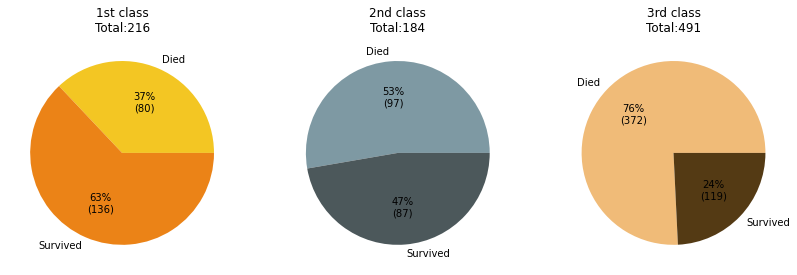

In [8]:
pie_overall = [sum(df['Pclass'] == i) for i in [1, 2, 3]]
pie_1st = sum((df['Pclass'] == 1) & (df['Survived'] == 1)) / sum(df['Pclass'] == 1)
pie_1st = [1 - pie_1st, pie_1st]
pie_2nd = sum((df['Pclass'] == 2) & (df['Survived'] == 1)) / sum(df['Pclass'] == 2)
pie_2nd = [1 - pie_2nd, pie_2nd]
pie_3rd = sum((df['Pclass'] == 3) & (df['Survived'] == 1)) / sum(df['Pclass'] == 3)
pie_3rd = [1 - pie_3rd, pie_3rd]

fig, ax = plt.subplots(1, 3, figsize=(14,14))

ax[0].pie(pie_1st, labels=['Died', 'Survived'], 
          autopct=lambda pct: f'{pct:1.0f}%\n({pct*pie_overall[0]/100:,.0f})', colors=['#F3C623', '#EB8317'])
ax[0].set_title(f'1st class\nTotal:{sum(df['Pclass'] == 1):,}')

ax[1].pie(pie_2nd, labels=['Died', 'Survived'], 
          autopct=lambda pct: f'{pct:1.0f}%\n({pct*pie_overall[1]/100:,.0f})', colors=['#7E99A3', '#4C585B'])
ax[1].set_title(f'2nd class\nTotal:{sum(df['Pclass'] == 2):,}')

ax[2].pie(pie_3rd, labels=['Died', 'Survived'], 
          autopct=lambda pct: f'{pct:1.0f}%\n({pct*pie_overall[2]/100:,.0f})', colors=['#F0BB78', '#543A14'])
ax[2].set_title(f'3rd class\nTotal:{sum(df['Pclass'] == 3):,}')

plt.show()

From these pie charts we can make the inferrence that the higher the class, the better the odds at survival. 

The price of the tickets may also show us how being able to afford a more expensive ticket could be related to your privileged position. In part 1 of this project, we saw that some passengers would travel together on the same ticket (recall Mrs. Stone and her alleged maid Miss. Icard). When you look at the fares of those tickets, they are all the same for the passengers traveling on the same ticket. We have to check whether we can assume these ticket prices were paid by each individual in the group. Let's look at the three most shared tickets.

In [9]:
df['Ticket'].value_counts()

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64

In [10]:
df[df['Ticket'] == '347082']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Nationality,Missing_Age,Deck,Title,Surname,Firstname
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,unknown,S,"Nordic,Scandinavian,Sweden",0,unknown,Mr.,Andersson,Anders
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,unknown,S,"Nordic,Scandinavian,Denmark",0,unknown,Miss.,Andersson,Ellis
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,unknown,S,"Nordic,Scandinavian,Sweden",0,unknown,Miss.,Andersson,Ingeborg
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,unknown,S,"Nordic,Scandinavian,Sweden",0,unknown,Miss.,Andersson,Sigrid
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,unknown,S,"EastAsian,Malay,Indonesia",0,unknown,Mrs.,Brogren,Alfrida
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,unknown,S,"Nordic,Scandinavian,Sweden",0,unknown,Miss.,Andersson,Ebba
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,unknown,S,"Nordic,Scandinavian,Sweden",0,unknown,Master.,Andersson,Sigvard


In [11]:
df[df['Ticket'] == 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Nationality,Missing_Age,Deck,Title,Surname,Firstname
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,unknown,S,CelticEnglish,1,unknown,Master.,Sage,Thomas
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,unknown,S,CelticEnglish,1,unknown,Miss.,Sage,Constance
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,unknown,S,CelticEnglish,1,unknown,Mr.,Sage,Frederick
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,unknown,S,CelticEnglish,1,unknown,Mr.,Sage,George
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,unknown,S,CelticEnglish,1,unknown,Miss.,Sage,Stella
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,unknown,S,CelticEnglish,1,unknown,Mr.,Sage,Douglas
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,unknown,S,CelticEnglish,1,unknown,Miss.,Sage,Dorothy


In [12]:
df[df['Ticket'] == '1601']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Nationality,Missing_Age,Deck,Title,Surname,Firstname
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,unknown,S,CelticEnglish,0,unknown,Mr.,Bing,Lee
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,unknown,S,"EastAsian,Chinese",0,unknown,Mr.,Ling,Lee
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,unknown,S,"European,German",0,unknown,Mr.,Lang,Fang
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,unknown,S,"EastAsian,Chinese",1,unknown,Mr.,Foo,Choong
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,unknown,S,"EastAsian,Chinese",1,unknown,Mr.,Lam,Ali
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,unknown,S,"EastAsian,Indochina,Vietnam",1,unknown,Mr.,Lam,Len
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,unknown,S,"EastAsian,Indochina,Vietnam",0,unknown,Mr.,Chip,Chang


These three are all groups traveling on the same third class tickets. However, the way it's recorded, it looks like they paid quite a lot for the third class tickets compared to other people of the same class.

In [13]:
num_shared_tickets = sum(df['Ticket'].value_counts() > 1)
shared_tickets = df['Ticket'].value_counts().index[:num_shared_tickets]
df['SharedTicket'] = [1 if df.loc[i, 'Ticket'] in shared_tickets else 0 for i in range(df.shape[0])]

df.loc[(df['Pclass'] == 3) & (df['SharedTicket'] == 0), 'Fare'].describe()

count    343.000000
mean       8.456643
std        2.365856
min        4.012500
25%        7.733300
50%        7.895800
75%        8.050000
max       22.525000
Name: Fare, dtype: float64

Most people in the third class that did not share a ticket paid less than 10 pounds for their ticket. Half of all third class passengers paid between 7.7 and 8 pounds for their ticket. The Sage family would fall in this category if their fares were divided by the number of people traveling on the same ticket. Same goes for the group of men traveling together. The Andersson family would pay a little less per person. This could be due to them traveling with very small children which may be cheaper than for the group of adult men traveling together. We will create a new column with the adjusted fares and drop the original `Fare` column.

In [14]:
df['TicketGroupSize'] = [sum(df['Ticket'] == df.loc[i, 'Ticket']) 
                               if df.loc[i, 'Ticket'] in shared_tickets else 1 for i in range(df.shape[0])]
df['IndividualFare'] = [df.loc[i, 'Fare'] / df.loc[i, 'TicketGroupSize'] for i in range(df.shape[0])]

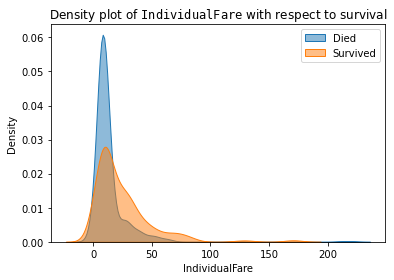

In [15]:
sns.kdeplot(df['IndividualFare'].iloc[np.where(df['Survived'] == 0)], fill=True, alpha=0.5, label='Died')
sns.kdeplot(df['IndividualFare'].iloc[np.where(df['Survived'] == 1)], fill=True, alpha=0.5, label='Survived')
plt.legend()
plt.title('Density plot of ' + r'$\mathtt{IndividualFare}$' + ' with respect to survival')
plt.show()

The conclusion of this density plot would be: less expensive tickets come with lower survival rates. We noticed that traveling with lower class tickets comes with lower survival rates compared to higher class tickets.

In [16]:
print(f'Average fare 1st class: {np.mean(df.loc[df['Pclass'] == 1, 'IndividualFare']):.2f}')
print(f'Average fare 2nd class: {np.mean(df.loc[df['Pclass'] == 2, 'IndividualFare']):.2f}')
print(f'Average fare 3rd class: {np.mean(df.loc[df['Pclass'] == 3, 'IndividualFare']):.2f}')

Average fare 1st class: 43.65
Average fare 2nd class: 13.32
Average fare 3rd class: 8.09


Obviously, higher class tickets cost more. This means that the fare and class are correlated with each other.

### 2.4 The Effect of Traveling with Relatives on Survival

We have already touched upon people who travel in groups. Some of them are friends or colleagues and some of them are families. There are two columns that recorded the number of relatives one is traveling with. `SibSp` represents the number of siblings or spouses a person is traveling with, and `Parch` the number of parents or children. However, as one might have noticed in the previous section, these numbers do not seem reliable. The members of the Sage family all are said to be traveling with 8 siblings, even the parents. They're also all said to be traveling with two parents or children. That's obviously not correct. The mother and father of this family is not traveling with their parents or with only two children, and they're also not traveling with 8 siblings or spouses. This mistake was made for the Andersson family.

First, we will check whether all relatives shared their tickets.

In [17]:
print('Number of passengers that traveled with at least one relative:', sum(df['SibSp'] + df['Parch'] > 0))
print('Number of passengers that shared their tickets with relatives:', 
      sum([df.loc[i, 'SharedTicket'] for i in range(df.shape[0]) 
           if df.loc[i, 'SibSp'] + df.loc[i, 'Parch'] > 0]))

Number of passengers that traveled with at least one relative: 354
Number of passengers that shared their tickets with relatives: 269


This tells us that not all relatives shared their tickets with each other.

Did traveling with relatives positively influence your odds at survival?

In [18]:
for sibsp in set(df['SibSp']):
    print(f'Survival rate traveling with {sibsp} siblings/spouses: {100*sum((df['SibSp'] == sibsp) & (df['Survived'] == 1)) / sum(df['SibSp'] == sibsp):.2f}% (from {sum(df['SibSp'] == sibsp)})')

Survival rate traveling with 0 siblings/spouses: 34.54% (from 608)
Survival rate traveling with 1 siblings/spouses: 53.59% (from 209)
Survival rate traveling with 2 siblings/spouses: 46.43% (from 28)
Survival rate traveling with 3 siblings/spouses: 25.00% (from 16)
Survival rate traveling with 4 siblings/spouses: 16.67% (from 18)
Survival rate traveling with 5 siblings/spouses: 0.00% (from 5)
Survival rate traveling with 8 siblings/spouses: 0.00% (from 7)


In [19]:
for parch in set(df['Parch']):
    print(f'Survival rate traveling with {parch} parents/children: {100*sum((df['Parch'] == parch) & (df['Survived'] == 1)) / sum(df['Parch'] == parch):.2f}% (from {sum(df['Parch'] == parch)})')

Survival rate traveling with 0 parents/children: 34.37% (from 678)
Survival rate traveling with 1 parents/children: 55.08% (from 118)
Survival rate traveling with 2 parents/children: 50.00% (from 80)
Survival rate traveling with 3 parents/children: 60.00% (from 5)
Survival rate traveling with 4 parents/children: 0.00% (from 4)
Survival rate traveling with 5 parents/children: 20.00% (from 5)
Survival rate traveling with 6 parents/children: 0.00% (from 1)


If you're traveling with a spouse or with one or two siblings, you actually seem to have had a better chance at survival than traveling alone. Traveling with parents or with a couple of children also seem to have had a positve effect. However, when the group becomes too big, the odds decline. However, there weren't many families of sizes bigger than 4 or 5 persons, so it's hard to make conclusions that are statistically sound. We can also see how sharing a ticket (regardless of being related) may influence the survival rates.

In [20]:
for size in set(df['TicketGroupSize']):
    print(f'Survival rate sharing a ticket with {size - 1} other people: {100*sum((df['TicketGroupSize'] == size) & (df['Survived'] == 1)) / sum(df['TicketGroupSize'] == size):.2f}% (from {sum(df['TicketGroupSize'] == size)})')

Survival rate sharing a ticket with 0 other people: 29.80% (from 547)
Survival rate sharing a ticket with 1 other people: 57.45% (from 188)
Survival rate sharing a ticket with 2 other people: 69.84% (from 63)
Survival rate sharing a ticket with 3 other people: 50.00% (from 44)
Survival rate sharing a ticket with 4 other people: 0.00% (from 10)
Survival rate sharing a ticket with 5 other people: 0.00% (from 18)
Survival rate sharing a ticket with 6 other people: 23.81% (from 21)


Traveling with a couple of other people did seem to increase the odds at survival. 

Is it the exact number of people you're traveling with that increases your odds at survival, or is it merely the fact that you're not alone that increases your odds at survival? The very large groups seem to have been dragged down by all the group/family members. Or maybe it's just one or two families that just unfatefully drowned and bringing the survival rate down. This is why it may be a better idea to pool all these people together in one dummy variable and ignore the very large groups. It seems that traveling with other people significantly increases your odds at survival, regardless of whether they're your relatives or companions. We'll create one column that shows whether someone traveled solo.

In [21]:
df['Solo'] = [1 if df.loc[i, 'SibSp'] + df.loc[i, 'Parch'] + df.loc[i, 'TicketGroupSize'] == 1 else 0 for i in range(df.shape[0])]

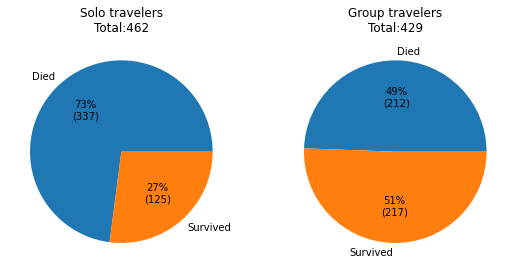

In [22]:
pie_overall = [np.mean(df['Solo']), 1 - np.mean(df['Solo'])]
pie_solo = [sum(df['Solo']*(1 - df['Survived'])), sum(df['Solo']*df['Survived'])]
pie_company = [sum((1 - df['Solo'])*(1 - df['Survived'])), sum((1 - df['Solo'])*df['Survived'])]

fig, ax = plt.subplots(1, 2, figsize=(9,9))

ax[0].pie(pie_solo, labels=['Died', 'Survived'], 
          autopct=lambda pct: f'{pct:1.0f}%\n({pct*pie_overall[0]*df.shape[0]/100:,.0f})')
ax[0].set_title(f'Solo travelers\nTotal:{pie_overall[0]*df.shape[0]:,.0f}')

ax[1].pie(pie_company, labels=['Died', 'Survived'], 
          autopct=lambda pct: f'{pct:1.0f}%\n({pct*pie_overall[1]*df.shape[0]/100:,.0f})')
ax[1].set_title(f'Group travelers\nTotal:{pie_overall[1]*df.shape[0]:,.0f}')

plt.show()

Another column that relates to class and wealth is the column that contains the honorrific titles.

In [23]:
for title in set(df['Title']):
    print(f'Survival rate title {title}: {100*sum((df['Title'] == title) & (df['Survived'] == 1)) / sum(df['Title'] == title):.2f}% (from {sum(df['Title'] == title)})')

Survival rate title Jonkheer.: 0.00% (from 1)
Survival rate title Lady.: 100.00% (from 1)
Survival rate title Sir.: 100.00% (from 1)
Survival rate title Countess: 100.00% (from 1)
Survival rate title Mrs.: 79.20% (from 125)
Survival rate title Miss.: 69.78% (from 182)
Survival rate title Major.: 50.00% (from 2)
Survival rate title Ms.: 100.00% (from 1)
Survival rate title Mme.: 100.00% (from 1)
Survival rate title Master.: 57.50% (from 40)
Survival rate title Rev.: 0.00% (from 6)
Survival rate title Mlle.: 100.00% (from 2)
Survival rate title Dr.: 42.86% (from 7)
Survival rate title Capt.: 0.00% (from 1)
Survival rate title Col.: 50.00% (from 2)
Survival rate title Don.: 0.00% (from 1)
Survival rate title Mr.: 15.67% (from 517)


In [24]:
for title in df['Title'].value_counts().index:
    print(f'Survival rate title {title}: {100*sum((df['Title'] == title) & (df['Survived'] == 1)) / sum(df['Title'] == title):.2f}% (from {sum(df['Title'] == title)})')

Survival rate title Mr.: 15.67% (from 517)
Survival rate title Miss.: 69.78% (from 182)
Survival rate title Mrs.: 79.20% (from 125)
Survival rate title Master.: 57.50% (from 40)
Survival rate title Dr.: 42.86% (from 7)
Survival rate title Rev.: 0.00% (from 6)
Survival rate title Col.: 50.00% (from 2)
Survival rate title Mlle.: 100.00% (from 2)
Survival rate title Major.: 50.00% (from 2)
Survival rate title Ms.: 100.00% (from 1)
Survival rate title Mme.: 100.00% (from 1)
Survival rate title Don.: 0.00% (from 1)
Survival rate title Lady.: 100.00% (from 1)
Survival rate title Sir.: 100.00% (from 1)
Survival rate title Capt.: 0.00% (from 1)
Survival rate title Countess: 100.00% (from 1)
Survival rate title Jonkheer.: 0.00% (from 1)


Only the common titles Mr., Mrs., Miss. and Master. are used by enough people to be included in a statistical model. These titles are directly correlated to sex and age.

### 4.5 The Effect of Port of Embarkation on Survival

Passengers embarked the ships from three different ports: Southampton, Cherbourg and Queenstown. 

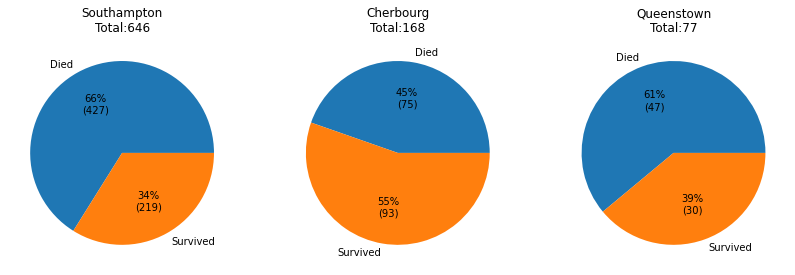

In [25]:
pie_overall = [sum(df['Embarked'] == i) for i in ['S', 'C', 'Q']]
pie_S = sum((df['Embarked'] == 'S') & (df['Survived'] == 1)) / sum(df['Embarked'] == 'S')
pie_S = [1 - pie_S, pie_S]
pie_C = sum((df['Embarked'] == 'C') & (df['Survived'] == 1)) / sum(df['Embarked'] == 'C')
pie_C = [1 - pie_C, pie_C]
pie_Q = sum((df['Embarked'] == 'Q') & (df['Survived'] == 1)) / sum(df['Embarked'] == 'Q')
pie_Q = [1 - pie_Q, pie_Q]

fig, ax = plt.subplots(1, 3, figsize=(14,14))

ax[0].pie(pie_S, labels=['Died', 'Survived'], 
          autopct=lambda pct: f'{pct:1.0f}%\n({pct*pie_overall[0]/100:,.0f})')
ax[0].set_title(f'Southampton\nTotal:{sum(df['Embarked'] == 'S'):,}')

ax[1].pie(pie_C, labels=['Died', 'Survived'], 
          autopct=lambda pct: f'{pct:1.0f}%\n({pct*pie_overall[1]/100:,.0f})')
ax[1].set_title(f'Cherbourg\nTotal:{sum(df['Embarked'] == 'C'):,}')

ax[2].pie(pie_Q, labels=['Died', 'Survived'], 
          autopct=lambda pct: f'{pct:1.0f}%\n({pct*pie_overall[2]/100:,.0f})')
ax[2].set_title(f'Queenstown\nTotal:{sum(df['Embarked'] == 'Q'):,}')

plt.show()

Passengers who embarked from Cherbourg had a significantly higher survival rate than passengers who embarked from the other two ports.

In [26]:
class_port = pd.DataFrame(np.zeros([3, 3]), index=[1, 2, 3], columns=['S', 'C', 'Q'])

for i in [1, 2, 3]:
    for port in ['S', 'C', 'Q']:
        class_port.loc[i, port] = sum((df['Pclass'] == i) & (df['Embarked'] == port))

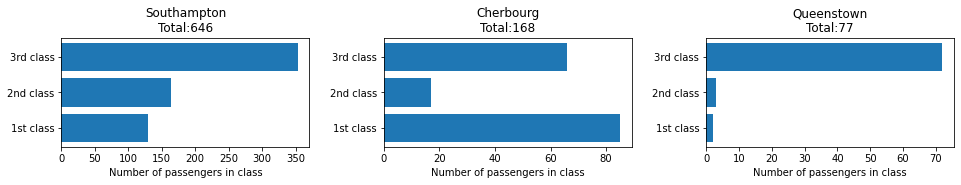

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(16,2), gridspec_kw={'wspace': 0.3})

ax[0].barh(['1st class', '2nd class', '3rd class'], class_port['S'])
ax[0].set_xlabel('Number of passengers in class')
ax[0].set_title(f'Southampton\nTotal:{sum(df['Embarked'] == 'S'):,}')

ax[1].barh(['1st class', '2nd class', '3rd class'], class_port['C'])
ax[1].set_xlabel('Number of passengers in class')
ax[1].set_title(f'Cherbourg\nTotal:{sum(df['Embarked'] == 'C'):,}')

ax[2].barh(['1st class', '2nd class', '3rd class'], class_port['Q'])
ax[2].set_xlabel('Number of passengers in class')
ax[2].set_title(f'Queenstown\nTotal:{sum(df['Embarked'] == 'Q'):,}')

plt.show()

Notice that the group of passengers that embarked from Queenstown consists of almost solely of third class travelers. The largest class that embarked from Cherbourg is the first class. The group embarking from Southampton looks more like what you would expect the distribution over the classes would look like. We already saw that the higher the class, the better the odds at survival, so it makes sense that the group embarking from Cherbourg has a significantly higher survival rate. However, even though the group from Southampton has a lot of first and second class travelers while the group from Queenstown has barely any higher class travelers, the group from Queenstown still has a higher overall survival rate.

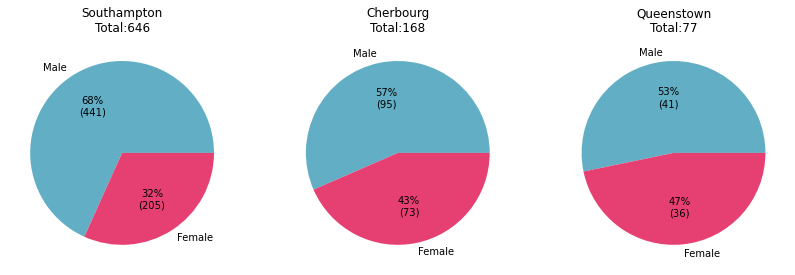

In [28]:
pie_overall = [sum(df['Embarked'] == i) for i in ['S', 'C', 'Q']]
pie_S = sum((df['Embarked'] == 'S') & (df['Sex'] == 'female')) / sum(df['Embarked'] == 'S')
pie_S = [1 - pie_S, pie_S]
pie_C = sum((df['Embarked'] == 'C') & (df['Sex'] == 'female')) / sum(df['Embarked'] == 'C')
pie_C = [1 - pie_C, pie_C]
pie_Q = sum((df['Embarked'] == 'Q') & (df['Sex'] == 'female')) / sum(df['Embarked'] == 'Q')
pie_Q = [1 - pie_Q, pie_Q]

fig, ax = plt.subplots(1, 3, figsize=(14,14))

ax[0].pie(pie_S, labels=['Male', 'Female'], 
          autopct=lambda pct: f'{pct:1.0f}%\n({pct*pie_overall[0]/100:,.0f})', colors=['#62aec5', '#e64072'])
ax[0].set_title(f'Southampton\nTotal:{sum(df["Embarked"] == "S"):,}')

ax[1].pie(pie_C, labels=['Male', 'Female'], 
          autopct=lambda pct: f'{pct:1.0f}%\n({pct*pie_overall[1]/100:,.0f})', colors=['#62aec5', '#e64072'])
ax[1].set_title(f'Cherbourg\nTotal:{sum(df["Embarked"] == "C"):,}')

ax[2].pie(pie_Q, labels=['Male', 'Female'], 
          autopct=lambda pct: f'{pct:1.0f}%\n({pct*pie_overall[2]/100:,.0f})', colors=['#62aec5', '#e64072'])
ax[2].set_title(f'Queenstown\nTotal:{sum(df["Embarked"] == "Q"):,}')

plt.show()

There were relatively more men embarking from Southampton than from Queenstown. That may explain why travelers from Queenstown had a higher survival rate as the overall survival rate for women was significantly higher than for men.

Not only do we have information on where passengers embarked form, for a handful of passengers, we also know the deck.

In [29]:
for deck in sorted(set(df['Deck'])):
    print(f'Survival rate deck {deck}: {100*sum((df['Deck'] == deck) & (df['Survived'] == 1)) / sum(df['Deck'] == deck):.2f}% (from {sum(df['Deck'] == deck)})')

Survival rate deck A: 46.67% (from 15)
Survival rate deck B: 74.47% (from 47)
Survival rate deck C: 59.32% (from 59)
Survival rate deck D: 75.76% (from 33)
Survival rate deck E: 75.00% (from 32)
Survival rate deck F: 61.54% (from 13)
Survival rate deck G: 50.00% (from 4)
Survival rate deck T: 0.00% (from 1)
Survival rate deck unknown: 29.99% (from 687)


For every known deck, the survival rate is higher than the overall survival rate. 

In [30]:
print(f'Survival rate of passengers for whom the deck is known: {100*np.mean(df.loc[df['Deck'] != 'unknown', 'Survived']):.2f}%')

Survival rate of passengers for whom the deck is known: 66.67%


The fact that the survival rate of passengers of whom the deck is known is higher than their counterpart is probably due to the survivers being able to tell the cabin numbers in their narrations of the disaster.

Since the deck is known for only a small share of the passengers, we will only use the fact whether the deck is known or not. We will create a new column for the binary feature `DeckKnown` which tells whether the deck is known since we see significant difference in the survival rate between passengers for whom it's known and the ones for whom it isn't.

In [31]:
df['DeckKnown'] = [0 if deck == 'unknown' else 1 for deck in df['Deck']]

### 4.6 The Effect of Nationality on Survival

We predicted the ethnic backgrounds of the passengers using their names. We're interested if the ethnic background has any effect on the odds at survival.

In [32]:
for nat in df['Nationality'].value_counts().index:
    print(f'Survival rate {nat}: {100*sum((df['Nationality'] == nat) & (df['Survived'] == 1)) / sum(df['Nationality'] == nat):.2f}% (from {sum(df['Nationality'] == nat)})')

Survival rate CelticEnglish: 41.78% (from 493)
Survival rate European,French: 50.63% (from 79)
Survival rate European,German: 38.57% (from 70)
Survival rate Nordic,Scandinavian,Sweden: 25.37% (from 67)
Survival rate Hispanic,Spanish: 42.50% (from 40)
Survival rate Nordic,Finland: 39.13% (from 23)
Survival rate Nordic,Scandinavian,Norway: 23.53% (from 17)
Survival rate European,SouthSlavs: 6.25% (from 16)
Survival rate Hispanic,Portuguese: 37.50% (from 16)
Survival rate EastAsian,Malay,Indonesia: 20.00% (from 15)
Survival rate Muslim,Nubian: 16.67% (from 12)
Survival rate Nordic,Scandinavian,Denmark: 0.00% (from 11)
Survival rate European,Italian,Italy: 50.00% (from 8)
Survival rate African,EastAfrican: 33.33% (from 3)
Survival rate EastAsian,Chinese: 66.67% (from 3)
Survival rate Muslim,Persian: 0.00% (from 2)
Survival rate Hispanic,Philippines: 0.00% (from 2)
Survival rate European,Italian,Romania: 0.00% (from 2)
Survival rate Greek: 50.00% (from 2)
Survival rate EastAsian,Indochina,V

The largest group by far is the 'CelticEnglish' group consisting of 493 passengers with a survival rate of about 42 percent. This is slightly higher than the overall survival rate which we computed to be around 38 percent. The second largest group is the French consisting of 79 people with a survival rate of 51 percent. They're followed by 70 Germans with a survival rate of 39 percent. As we can see, someone's nationality can have a significant influence on whether you survive or not. 

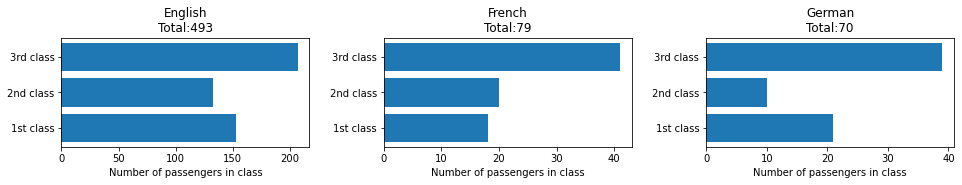

In [33]:
class_nat = pd.DataFrame(np.zeros([3, 3]), index=[1, 2, 3], columns=['S', 'C', 'Q'])

for i in [1, 2, 3]:
    for nat in ['CelticEnglish', 'European,French', 'European,German']:
        class_nat.loc[i, nat] = sum((df['Pclass'] == i) & (df['Nationality'] == nat))

fig, ax = plt.subplots(1, 3, figsize=(16,2), gridspec_kw={'wspace': 0.3})

ax[0].barh(['1st class', '2nd class', '3rd class'], class_nat['CelticEnglish'])
ax[0].set_xlabel('Number of passengers in class')
ax[0].set_title(f'English\nTotal:{sum(df['Nationality'] == 'CelticEnglish'):,}')

ax[1].barh(['1st class', '2nd class', '3rd class'], class_nat['European,French'])
ax[1].set_xlabel('Number of passengers in class')
ax[1].set_title(f'French\nTotal:{sum(df['Nationality'] == 'European,French'):,}')

ax[2].barh(['1st class', '2nd class', '3rd class'], class_nat['European,German'])
ax[2].set_xlabel('Number of passengers in class')
ax[2].set_title(f'German\nTotal:{sum(df['Nationality'] == 'European,German'):,}')

plt.show()

The English group has relatively more first and second class travelers compared to the other two groups. The German group has relatively more third class travelers than the French, but the French group has relatively more second class travelers. It's hard to explain the survival rates with these graphs. Maybe sex can give a better explanation.

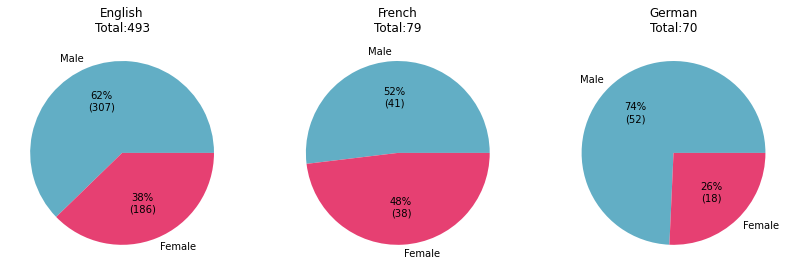

In [34]:
pie_overall = [sum(df['Nationality'] == i) for i in ['CelticEnglish', 'European,French', 'European,German']]
pie_S = sum((df['Nationality'] == 'CelticEnglish') & (df['Sex'] == 'female')) / sum(df['Nationality'] == 'CelticEnglish')
pie_S = [1 - pie_S, pie_S]
pie_C = sum((df['Nationality'] == 'European,French') & (df['Sex'] == 'female')) / sum(df['Nationality'] == 'European,French')
pie_C = [1 - pie_C, pie_C]
pie_Q = sum((df['Nationality'] == 'European,German') & (df['Sex'] == 'female')) / sum(df['Nationality'] == 'European,German')
pie_Q = [1 - pie_Q, pie_Q]

fig, ax = plt.subplots(1, 3, figsize=(14,14))

ax[0].pie(pie_S, labels=['Male', 'Female'], 
          autopct=lambda pct: f'{pct:1.0f}%\n({pct*pie_overall[0]/100:,.0f})', colors=['#62aec5', '#e64072'])
ax[0].set_title(f'English\nTotal:{sum(df["Nationality"] == "CelticEnglish"):,}')

ax[1].pie(pie_C, labels=['Male', 'Female'], 
          autopct=lambda pct: f'{pct:1.0f}%\n({pct*pie_overall[1]/100:,.0f})', colors=['#62aec5', '#e64072'])
ax[1].set_title(f'French\nTotal:{sum(df["Nationality"] == "European,French"):,}')

ax[2].pie(pie_Q, labels=['Male', 'Female'], 
          autopct=lambda pct: f'{pct:1.0f}%\n({pct*pie_overall[2]/100:,.0f})', colors=['#62aec5', '#e64072'])
ax[2].set_title(f'German\nTotal:{sum(df["Nationality"] == "European,German"):,}')

plt.show()

The French have an almost 50/50 split between the two sexes, whereas the other two groups are male dominated. Sex seems to directly explain the differences in survival rates.

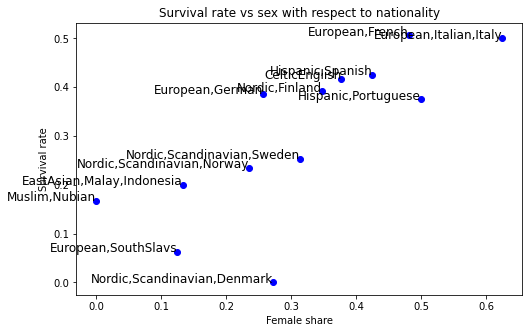

In [35]:
GroupSize5Plus = sum(df['Nationality'].value_counts() >= 5)

labels = df['Nationality'].value_counts().head(GroupSize5Plus).index.tolist()
SurvivalRate = [sum((df['Nationality'] == nat) & (df['Survived'] == 1)) / 
                sum(df['Nationality'] == nat) for nat in labels]
FemaleShare = [sum((df['Nationality'] == nat) & (df['Sex'] == 'female')) / 
               sum(df['Nationality'] == nat) for nat in labels]

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(FemaleShare, SurvivalRate, color='b')

for i in range(len(labels)):
    ax.text(FemaleShare[i], SurvivalRate[i], labels[i], fontsize=12, ha='right')

ax.set_xlabel("Female share")
ax.set_ylabel("Survival rate")
ax.set_title("Survival rate vs sex with respect to nationality")

plt.show()

In the scatter plot above, we can see that the effect of the ethnic background is directly related to the female dominance in the group. Also, if you go back in this report where we are printing several rows, you can notice that the predicted nationalities don't seem very reliable. Some people with clearly Germanic names are predicted to be Asian and vice versa. Therefore, we should not include this feature into our model.

## 3. Reviewing Feature Selection

We have gone through all the features and created some new one along the way. We have noticed that some columns are not really appropriate to use to model survival due to several reasons.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Name             891 non-null    object 
 4   Sex              891 non-null    object 
 5   Age              714 non-null    float64
 6   SibSp            891 non-null    int64  
 7   Parch            891 non-null    int64  
 8   Ticket           891 non-null    object 
 9   Fare             891 non-null    float64
 10  Cabin            891 non-null    object 
 11  Embarked         891 non-null    object 
 12  Nationality      891 non-null    object 
 13  Missing_Age      891 non-null    int64  
 14  Deck             891 non-null    object 
 15  Title            891 non-null    object 
 16  Surname          891 non-null    object 
 17  Firstname       

We won't need the columns containing the names of the passengers anymore. We used them to derive their titles and ethnic/cultural backgrounds. We have also used them to try and match passengers to relatives in the cases their was some information missing. We won't need the names anymore from here on out.

In [37]:
df.drop(columns=['Name', 'Surname', 'Firstname'], inplace=True)

We noticed some inconsistencies in the columns `SibSp` and `Parch`, so we decided to create the column `Solo` and use that one instead. The column `Solo` was derived from `TicketGroupSize`, `SibSp` and `Parch`. The newly created column is not only based on whether a passenger has relatives on board, but also on whether someone is sharing a ticket with a non-relative as we have seen that companions increase the odds ad survival regardless of them being related. We will drop `SibSp` and `Parch`.

In [38]:
df.drop(columns=['SibSp', 'Parch'], inplace=True)

From `Ticket`, we derived `SharedTicket` and `TicketGroupSize`. It also assisted in dealing with missing values. Other information could be derived from the prefixes. In part 1 of this project we decided against this as this would be quite tedious work and requires looking up extra context on the web. We will drop this column.

In [39]:
df.drop(columns=['Ticket'], inplace=True)

The column `Fare` does not correctly represent the individual fares which leads to inconsistencies. The column `IndividualFare` was created to replace the original column.

In [40]:
df.drop(columns=['Fare'], inplace=True)

We derived `Deck` from `Cabin`. This is known for only a small portion of the dataset. It is not statistically desirable to split this small portion into relatively small groups based on decks. Instead, we will use `DeckKnown` as we have seen that just knowing whether a passenger's cabin was recorded or not has a significant effect on the survival rate on its own.

In [41]:
df.drop(columns=['Cabin', 'Deck'], inplace=True)

We saw that `Nationality` is directly related to `Sex`. Furthermore, the predicted backgrounds may not be as reliable as desired. This column will be dropped.

In [42]:
df.drop(columns=['Nationality'], inplace=True)

And finally, we will drop `Title` as our analysis showed that this feature doesn't seem to add any information that can't be explained by the other variables. Also, may of the subgroups are rather small and the only groups significantly large are directly related to `Sex`.

In [43]:
df.drop(columns='Title', inplace=True)

In [44]:
df_train = df.copy()

This leaves us with 12 columns, of which one being the ID column and the other being the target, making that 10 features in the dataframe.

## 4. Matching Structures between the Training and Test Set

In the previous sections, we manipulated and dropped some columns. We have to make sure the test set matches the new structure of the training set.

We have to create `SharedTicket`, `TicketGroupSize` and`Solo`.

In [45]:
num_shared_tickets = sum(df_test['Ticket'].value_counts() > 1)
shared_tickets = df_test['Ticket'].value_counts().index[:num_shared_tickets]
df_test['SharedTicket'] = [1 if df_test.loc[i, 'Ticket'] in shared_tickets else 0 for i in range(df_test.shape[0])]
df_test['TicketGroupSize'] = [sum(df_test['Ticket'] == df_test.loc[i, 'Ticket']) 
                               if df_test.loc[i, 'Ticket'] in shared_tickets else 1 for i in range(df_test.shape[0])]
df_test['Solo'] = [1 if df_test.loc[i, 'SibSp'] + df_test.loc[i, 'Parch'] + 
                  df_test.loc[i, 'TicketGroupSize'] == 1 else 0 for i in range(df_test.shape[0])]

We can now drop `SibSp` and `Parch`.

In [46]:
df_test.drop(columns=['SibSp', 'Parch'], inplace=True)

The fares have to be adjusted to individual fares.

In [47]:
df_test['IndividualFare'] = [df_test.loc[i, 'Fare'] / df_test.loc[i, 'TicketGroupSize'] 
                                 for i in range(df_test.shape[0])]
df_test.drop(columns=['Fare', 'TicketGroupSize'], inplace=True)

`Fare` will be dropped form the dataset.

We also need to create `DeckKnown`.

In [48]:
df_test['DeckKnown'] = 0
df_test.loc[df_test['Cabin'] != 'unknown', 'DeckKnown'] = 1

The columns `Deck` and `Cabin` are dropped.

In [49]:
df_test.drop(columns=['Deck', 'Cabin'], inplace=True)

All the new features have been created. We can drop the remaining columns that were dropped in the training set as well.

In [50]:
df_test.drop(columns=['Name', 'Surname', 'Firstname', 'Ticket', 'Title'], inplace=True)

## 5. Summary

The goal of this analysis is to explore the relationship between various passenger attributes and their survival on the Titanic, using the training set. Each feature was examined to determine its potential predictive value. We saw that nfants had higher survival rates, though survivors tended to be slightly older overall. A strong correlation was found between sex and survival. Women had much higher survival rates than men. Higher-class passengers had better survival odds. Ticket prices were adjusted per passenger in group tickets to reflect individual cost more accurately. Traveling with 1–2 relatives or companions increased survival odds, but very large groups had worse outcomes. A new feature, `Solo`, was created to reflect this. Most titles were too rare to be statistically useful. Common titles (Mr., Mrs., Miss., Master) aligned closely with sex and age and were therefore redundant. Passengers from Cherbourg had the highest survival rate, partly due to class and sex distribution. Survival rates were significantly higher for passengers with known cabin/deck info. That is why the binary feature, `DeckKnown`, was introduced. While some ethnic groups showed different survival rates, this was largely due to sex and class differences. Additionally, the predictions were not reliably accurate, so the feature was dropped.

Based on the analysis, several original features were dropped due to redundancy, inaccuracy, or weak predictive power. These include:

- `Name`, `Surname`, `Firstname` → dropped as they are used only for extracting other information;
- `SibSp`, `Parch` → replaced by `Solo`;
- `Ticket` → replaced by `SharedTicket` and `TicketGroupSize`;
- `Fare` → replaced by `IndividualFare`;
- `Cabin`, `Deck` → replaced by `DeckKnown`;
- `Nationality` → dropped due to low reliability;
- `Title` → redundant with sex and age.

The cleaned datasets now contain 10 features.

In [51]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     418 non-null    int64  
 1   Pclass          418 non-null    int64  
 2   Sex             418 non-null    object 
 3   Age             332 non-null    float64
 4   Embarked        418 non-null    object 
 5   Nationality     418 non-null    object 
 6   Missing_Age     418 non-null    int64  
 7   SharedTicket    418 non-null    int64  
 8   Solo            418 non-null    int64  
 9   IndividualFare  418 non-null    float64
 10  DeckKnown       418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.1+ KB


In [52]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Sex              891 non-null    object 
 4   Age              714 non-null    float64
 5   Embarked         891 non-null    object 
 6   Missing_Age      891 non-null    int64  
 7   SharedTicket     891 non-null    int64  
 8   TicketGroupSize  891 non-null    int64  
 9   IndividualFare   891 non-null    float64
 10  Solo             891 non-null    int64  
 11  DeckKnown        891 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 83.7+ KB


We will save these restructured datasets for future use.

In [53]:
df_test.to_csv('testdata_after_eda.csv', index=False)
df_train.to_csv('traindata_after_eda.csv', index=False)